In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
data = load_iris()

In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


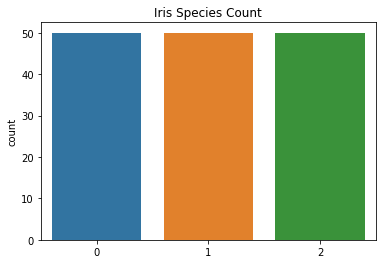

In [10]:
sns.countplot(data.target)
plt.title("Iris Species Count")
plt.show()

In [12]:
y = data.target

print(y.shape)

(150,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.data, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


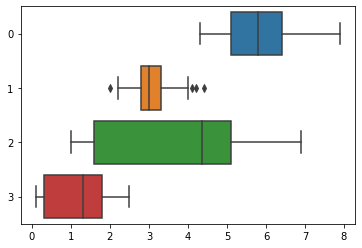

In [15]:
sns.boxplot(data=data.data, orient="h")
plt.show()

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

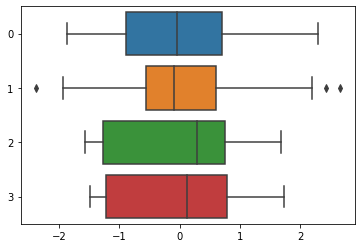

In [17]:
sns.boxplot(data=X_train, orient="h")
plt.show()

In [18]:
eucl_clf = KNeighborsClassifier(
    p=2,
    n_neighbors=5
)

manh_clf = KNeighborsClassifier(
    p=1,
    n_neighbors=5
)

maha_clf = KNeighborsClassifier(
    n_neighbors=5,
    metric="mahalanobis",
    metric_params={"V": np.cov(X_train, rowvar=False)}
)

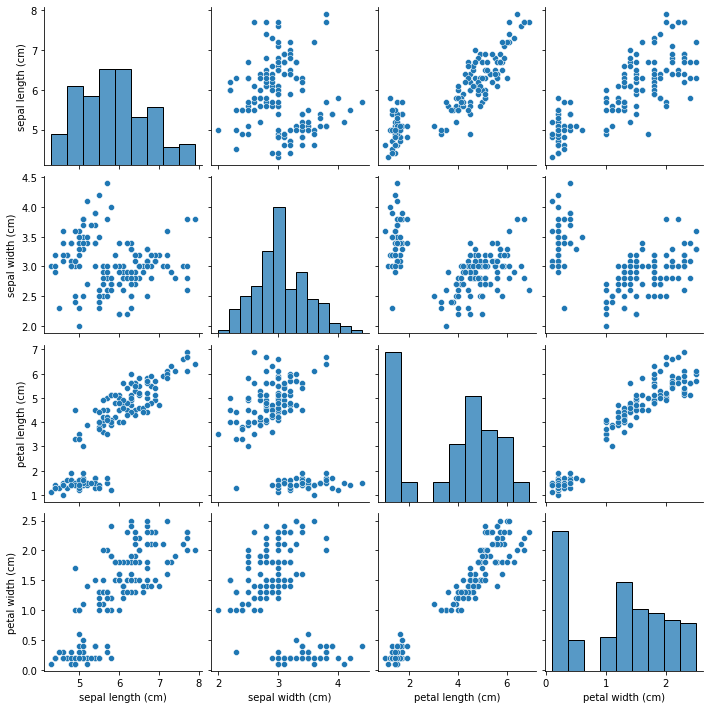

In [19]:
sns.pairplot(pd.DataFrame(data.data, columns=data.feature_names))
plt.show()

In [20]:
def train_and_test(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

In [21]:
train_and_test(eucl_clf, X_train, y_train, X_test, y_test)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [22]:
train_and_test(manh_clf, X_train, y_train, X_test, y_test)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [23]:
train_and_test(maha_clf, X_train, y_train, X_test, y_test)

[[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]
0.9210526315789473


In [27]:
accuracies = []
r = range(1, 40)
for i in r:
    knn = KNeighborsClassifier(
        n_neighbors=i,
        metric="mahalanobis",
        metric_params={"V": np.cov(X_train, rowvar=False)}
    )
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

In [28]:
accuracies

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632]

Text(0, 0.5, 'Accuracy')

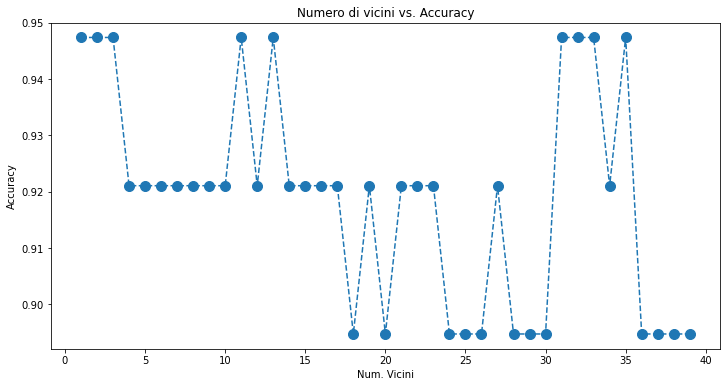

In [29]:
plt.figure(figsize=(12,6))
plt.plot(
    r,
    accuracies,
    linestyle="dashed",
    marker="o",
    markersize=10
)

plt.title("Numero di vicini vs. Accuracy")
plt.xlabel("Num. Vicini")
plt.ylabel("Accuracy")

In [33]:
np.array(accuracies).argmax()

0

In [36]:
knn = KNeighborsClassifier(
    n_neighbors=1,
    metric="mahalanobis",
    metric_params={"V": np.cov(X_train, rowvar=False)}
)

train_and_test(knn,  X_train, y_train, X_test, y_test)

[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
0.9473684210526315
